In this notebook I train a traditional (non-bayesian) convolutional neural network on the mnist dataset.

The main purpose here is to familiarise myself with pytorch

In [30]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [47]:
def load_mnist(
    root="../data/", train=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None, download=True):
    data = torchvision.datasets.MNIST(
        root=root,
        train=train,
        transform=transform,
        target_transform=target_transform,
        download=download
    )
    return torch.utils.data.DataLoader(data, batch_size=4)

In [48]:
train_set = load_mnist()
test_set = load_mnist(train=False)

torch.Size([4, 1, 28, 28])
tensor([5, 0, 4, 1])


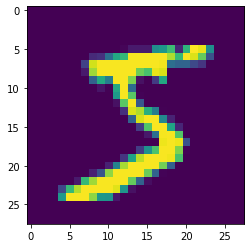

In [59]:
example_data = iter(train_set).next()
print(example_data[0].shape)
print(example_data[1])
plt.imshow(example_data[0][0][0])

Create a convolutional neural net

In [53]:
import torch.nn as nn
import torch.nn.functional as F

In [75]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # (28*28)
        self.conv1 = nn.Conv2d(1, 6, 5)
        # (6@ 24*24): 28-5+1 = 24
        self.pool = nn.MaxPool2d(2, 2)
        # (6@ 12*12)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # (16@ 8*8): 12-5+1 = 8
        # (16@ 4*4)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [76]:
net = Net()

Define a loss function

In [77]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    net.parameters(), lr=0.001, momentum=0.9)

Train the neural net

In [78]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_set):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.270
[1,  4000] loss: 0.294
[1,  6000] loss: 0.178
[1,  8000] loss: 0.156
[1, 10000] loss: 0.123
[1, 12000] loss: 0.123
[1, 14000] loss: 0.106
[2,  2000] loss: 0.091
[2,  4000] loss: 0.084
[2,  6000] loss: 0.073
[2,  8000] loss: 0.071
[2, 10000] loss: 0.070
[2, 12000] loss: 0.071
[2, 14000] loss: 0.063
Finished Training


In [79]:
torch.save(net.state_dict(), "../models/mnist-cnn.pth")